In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [168]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [169]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [170]:
df.shape

(15, 2)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [172]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [173]:
df.isnull()

,Chirps/Second,Ground Temperature
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [174]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [175]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [176]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [177]:
df["Chirps/Second"].quantile(0.25)

15.45

In [178]:
iqr = df["Chirps/Second"].quantile(0.75) -df["Chirps/Second"].quantile(0.25)
upper_threshold = df["Chirps/Second"].quantile(0.75) + (1.5 * iqr)
lower_threshold = df["Chirps/Second"].quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
print(lower_threshold)
     

19.699999999999996
12.9


In [179]:
df["Chirps/Second"]=df["Chirps/Second"].clip(12.9, 19.699999999999996)
df["Chirps/Second"]

0     19.7
1     16.0
2     19.7
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64

Text(0, 0.5, 'Ground Temperature')

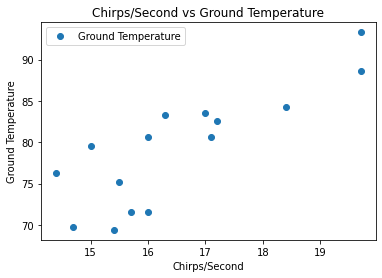

In [180]:
df.plot("Chirps/Second","Ground Temperature",style = 'o')
plt.title("Chirps/Second vs Ground Temperature")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")

In [181]:
df[["Chirps/Second","Ground Temperature"]].corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.834284
Ground Temperature,0.834284,1.000000


Extrapolate

In [182]:
X=df[["Ground Temperature"]].values
y=df["Chirps/Second"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [184]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [185]:
print(regressor.coef_,regressor.intercept_)

[1.04002931] 16.46


In [186]:
y_pred=regressor.predict(X_test)
y_pred

array([17.40710876, 15.06241456, 14.71163354, 19.06870307, 16.53938728])

In [187]:
data=pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
0,18.4,17.407109
1,15.7,15.062415
2,14.7,14.711634
3,19.7,19.068703
4,15.0,16.539387


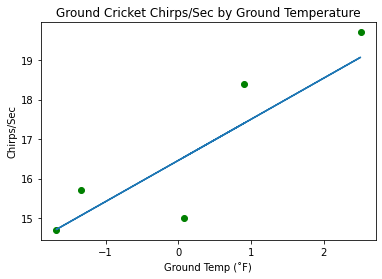

In [188]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test,y_pred )
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [189]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.7896495158895034

In [190]:
value=np.array(int(input("ground temp:" ))).reshape(-1,1)
regressor.predict(scaler.transform(value))

ground temp:95


array([19.38255977])

when ground temperature 95 then rate of chirping approx.19.38

Interpolate

In [191]:
X=df[["Chirps/Second"]].values
y=df["Ground Temperature"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [193]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [194]:
print(regressor.coef_,regressor.intercept_)

[6.17018575] 79.17000000000002


In [195]:
y_pred=regressor.predict(X_test)


In [196]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.513522930062268

In [197]:
value=np.array(int(input("rate of chirping:" ))).reshape(-1,1)
regressor.predict(scaler.transform(value))


rate of chirping:18


array([85.12373719])

when Rate of chirping 18 then ground temperature approx.84.58

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [198]:
df = pd.read_fwf("brain_body.txt")

In [199]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [200]:
df.shape


(62, 2)

In [201]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [202]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [203]:
df=df.drop_duplicates()

In [204]:
df=df.drop_duplicates()

In [205]:
iqr=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
lowerfence=df.Brain.quantile(0.25)-(iqr*1.5)
upperfence=df.Brain.quantile(0.75)+(iqr*1.5)
lowerfence,upperfence,iqr

(-70.80375000000001, 119.60625, 47.6025)

In [206]:
lowerfence

-70.80375000000001

In [207]:
upperfence
     

119.60625

In [208]:
df.Brain=df.Brain.clip(-70.80375000000001, 119.60625)

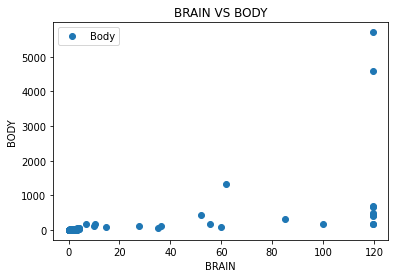

In [209]:
df.plot("Brain","Body",style="o")
plt.title("BRAIN VS BODY")
plt.xlabel("BRAIN")
plt.ylabel("BODY")
plt.show()
     

In [210]:
df[["Brain","Body"]].corr()

,Brain,Body
Brain,1.000000,0.510595
Body,0.510595,1.000000


In [211]:
X=df[["Brain"]].values
y=df["Body"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
     

In [212]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [213]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [233]:
print(regressor.intercept_,regressor.coef_)

354.7748837209302 [601.36834905]


In [239]:
df1=pd.DataFrame({"actual":y_test,"predicted":y_pred})
df1

,actual,predicted
0,440.0,654.723150
1,5.7,-34.028332
2,8.1,-28.248412
3,3.5,-35.842959
4,2.5,-44.996740
5,6.6,-32.952998
6,6.4,-40.681962
7,12.1,-12.790484
8,2.6,-34.297166
9,325.0,1096.147793


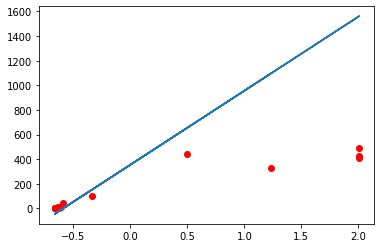

In [237]:
plt.scatter(X_test,y_test,color="r")
plt.plot(X_test,y_pred)

In [240]:
from sklearn import metrics
regressor.score(X_test,y_test)

-6.200465866235885

This equation is not good fit for this data

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [241]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [242]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [243]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [244]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [245]:
df.shape

(52, 6)

In [246]:
df=df.drop_duplicates()

In [247]:
df.columns


Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [248]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


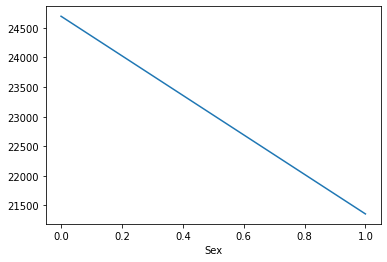

In [249]:
#df.plot("Sex","Salary",style="o")
df.groupby("Sex")["Salary"].mean().plot()
df[["Sex","Salary"]].corr()

In [250]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


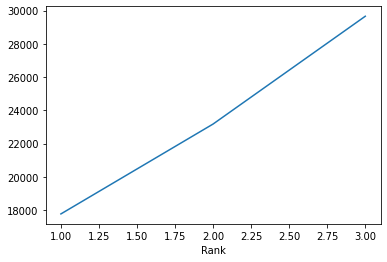

In [251]:
df.groupby('Rank')['Salary'].mean().plot()
df[["Rank","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


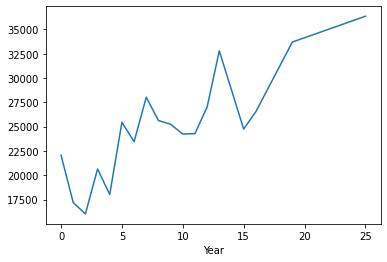

In [252]:
df.groupby('Year')['Salary'].mean().plot()
df[["Year","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


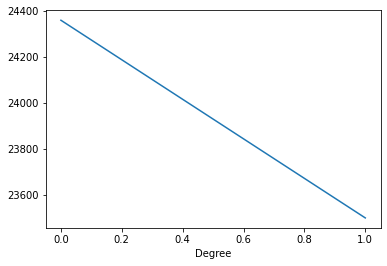

In [253]:
df.groupby('Degree')['Salary'].mean().plot()
df[["Degree","Salary"]].corr()

In [254]:
df["transformed_degree"]=np.square(df["Degree"])
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [255]:
df["transformed_degree"]=np.exp(df["Degree"])
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [256]:
df["transformed_degree"]=np.power(df["Degree"],3)
df[["transformed_degree","Salary"]].corr()

,transformed_degree,Salary
transformed_degree,1.000000,-0.069726
Salary,-0.069726,1.000000


,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


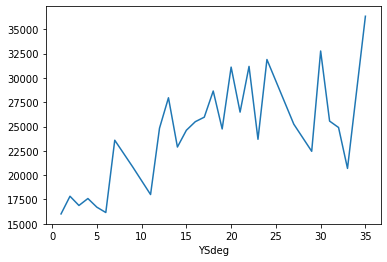

In [257]:
df.groupby('YSdeg')['Salary'].mean().plot()
df[["YSdeg","Salary"]].corr()
     

In [258]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary',
       'transformed_degree'],
      dtype='object')

In [259]:
X=df.loc[:,["Sex","Rank","Year","Degree","YSdeg"]].values
y=df["Salary"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [260]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [261]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [262]:
print(regressor.coef_,regressor.intercept_)

[  -64.47520995  4623.45227892  2394.06188141 -1073.72170188
 -1431.7331651 ] 22751.583333333332


In [263]:
y_pred=regressor.predict(X_test)

In [264]:
data=pd.DataFrame({"actual":y_test,"predicted":y_pred})
data

,actual,predicted
0,31850,30965.107225
1,25748,27583.755988
2,20300,15557.069486
3,19175,22659.976474
4,23725,22691.229784
5,22906,26305.818680
6,38045,26964.039202
7,24800,24592.770839
8,36350,33632.862490
9,20690,20749.334583


In [265]:
from sklearn import metrics
regressor.score(X_test,y_test)

0.6120985829492793

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scaling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import itertools

def findMaxR2Score():
  features= ['Sex','Rank','Year','Degree','YSdeg']
  #dict_of_r2scores= {}
  rand_st= random.randint(1, 50)
  maxR2Score= 0
  maxFeature = []

  for i in range(0, len(features)+1):
    for combo in itertools.combinations(features, i): 
      if len(combo) > 0:

        X= df.loc[:, list(combo)].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= rand_st)  
                
        
        
        scaler = StandardScaler() 
        
        scaler.fit(X_train,Y_train) 
        
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 
        

        regressor1 = LinearRegression()  
        regressor1.fit(X_train_scaled, Y_train)  

        Y_pred = regressor1.predict(X_test_scaled)
        if metrics.r2_score(Y_test,Y_pred) > maxR2Score:   
          maxR2Score= metrics.r2_score(Y_test,Y_pred)
          maxFeature= list(combo)
        

  print("Maximum R2 Score is for",maxFeature," and the R2 Score is:", maxR2Score)
  

findMaxR2Score()

Maximum R2 Score is for ['Rank', 'Year', 'Degree', 'YSdeg']  and the R2 Score is: 0.9257745104964484


In [277]:
        X= df.loc[:,["Sex"]].values
        Y= df['Salary'].values

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
       
        scaler = StandardScaler() 
        
        scaler.fit(X_train,Y_train) 
            
        
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 
        

        regressor1 = LinearRegression()  
        regressor1.fit(X_train_scaled, Y_train) 

        Y_pred = regressor1.predict(X_test_scaled)
       
        print(metrics.r2_score(Y_test,Y_pred))

-0.21176928335707856


In [273]:
import seaborn as sns

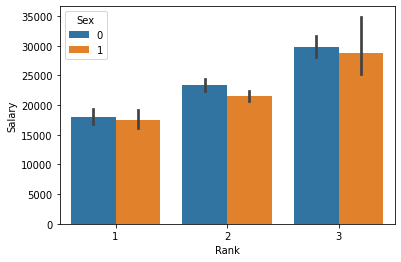

In [274]:
sns.barplot(x=df['Rank'], y= df['Salary'], hue=df['Sex'], data=df)

Not much more difference found in salary due to gender